# In this section, we will use the Discounted Cash Flow (DCF) Model to guage whether a stock is at a discount or a premium.

<i>Disclaimer: I am not a financial advisor and this article is not meant to represent any form of financial advice. Any investments you make using these calculations will carry risk so do remember to do your due diligence and research before doing so.</i>

## The concept behind DCF
>Imagine there exists a machine which will generate 100 in a year’s time. Would you pay 100 for it? Is 100 a break-even price?

### No!
#### This is because you have to wait a year to get the 100!

Instead, if you were to invest the 100 in a risk-interest rate of 2%, for example, you would receive 100 x 1.02 = 102 in a year's time. Hence, your 100 is worth 102 next year.

---

>So, what is the maximum amount of money you would pay for it to break-even? 

In other words, what is 100 received next year worth this year? To receive 100 in a year at a risk free interest rate of 2%, you would only need to make a risk-free investment of 100/1.02 = 98.04 this year. So you should pay a maximum of 98.04 for such a machine. In this example, 100 in a year is worth 96.15 today.


### Money received in the future is worth less today.

>What about a machine which generates 100 in the next year, AND 100 in the following year?

We already know that 100 in the next year is worth 98.04 today.

<b>100 in two years’ time is worth 100/1.02² = 96.12 today (100 divided by 1.02 twice). (i.e. investing 96.12 at 2% interest will get you 200 in 2 years.)</b>

Hence for this machine, you would pay a maximum of 98.04 + 96.12 = 194.16 today, which is of course lower than 200.

>What about a machine which generates 100 in each of the next 5 years?


### Future Cash Flows Discounted to Present Value
<img src="https://i.imgur.com/ZNg0zQx.png">

---

Hence, the general formula for calculating the present value of a machine which generates a cash flow of CF₁ in year 1, CF₂ in year 2 and so on for n years is this, assuming the discount rate is r:
Image for post
In the previous example of the machine, we have used a discount rate r equal to the risk-free rate of investing which we are assuming to be 2% (i.e. 0.02). This is not necessarily the case as we shall see later when we explore more about the discount rate.

_Note that future cash flows can increase if the company is growing. Also note that each one of the future cash flows are discounted to the present value before all of them are summed up to form the total present value._

<b>After calculating the present value of future cash flows, we need to add the cash and short term investments as well as subtract the total debt.</b>

### This is what we talked about summarised into an equation.
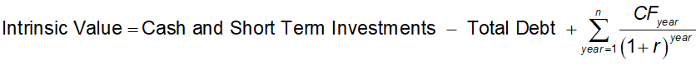

### Now we will walk through the calculation of the instrinsic value for AAPL (the largest component of S&P 500).
##### After that, we will just calculate the other 4 companies without walkthrough for simplicity.

In [1]:
# Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

# Settings to produce nice plots in a Jupyter notebook
plt.style.use('fivethirtyeight')
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 4]
import seaborn as sns

# To extract and parse fundamental data from finviz website
import requests
from bs4 import BeautifulSoup as bs

# For parsing financial statements data from financialmodelingprep api
from urllib.request import urlopen
import json
def get_jsonparsed_data(url):
    response = urlopen(url)
    data = response.read().decode("utf-8")
    return json.loads(data)

# Financialmodelingprep api url
base_url = "https://financialmodelingprep.com/api/v3/"

In [2]:
apiKey = "c666ff95d41eef82744356cb28a0c041"
ticker = "AAPL"

#### Firstly, we will obtain quarterly cash flow statements.

In [24]:
q_cash_flow_statement = pd.DataFrame(get_jsonparsed_data(base_url+'cash-flow-statement/' + ticker + '?period=quarter' + '&apikey=' + apiKey))
q_cash_flow_statement = q_cash_flow_statement.set_index('date').iloc[:4] # extract for last 4 quarters
q_cash_flow_statement = q_cash_flow_statement.apply(pd.to_numeric, errors='coerce')

q_cash_flow_statement.iloc[:,4:].head()

,netIncome,depreciationAndAmortization,deferredIncomeTax,stockBasedCompensation,changeInWorkingCapital,accountsReceivables,inventory,accountsPayables,otherWorkingCapital,otherNonCashItems,...,netCashUsedProvidedByFinancingActivities,effectOfForexChangesOnCash,netChangeInCash,cashAtEndOfPeriod,cashAtBeginningOfPeriod,operatingCashFlow,capitalExpenditure,freeCashFlow,link,finalLink
date,,,,,,,,,,,,,,,,,,,,,
2020-06-30,5179000000,1704000000,213000000.0,1695000000,-4957000000,-122000000,0.0,-56000000.0,56822000000,1738000000,...,-2152000000,95000000,-2358000000,21260000000,23618000000,3877000000,-3255000000,622000000,NaN,NaN
2020-03-31,4902000000,1597000000,477000000.0,1335000000,2684000000,2046000000,0.0,-44000000.0,54280000000,1341000000,...,-2022000000,-222000000,4648000000,23727000000,19079000000,11001000000,-3558000000,7443000000,NaN,NaN
2019-12-31,7349000000,1468000000,-395000000.0,1274000000,-608000000,-1697000000,0.0,111000000.0,51172000000,1269000000,...,-2026000000,178000000,3199000000,19178000000,15979000000,9083000000,-4100000000,4983000000,NaN,NaN
2019-09-30,6091000000,1416000000,174000000.0,1249000000,347000000,-328000000,0.0,89000000.0,48751000000,1279000000,...,-2019000000,-156000000,2082000000,15959000000,13877000000,9307000000,-3532000000,5775000000,NaN,NaN


#### Now, we will repeat the above, but this time, for annual cash flow statements.

In [4]:
cash_flow_statement = pd.DataFrame(get_jsonparsed_data(base_url+'cash-flow-statement/' + ticker + '?apikey=' + apiKey))
cash_flow_statement = cash_flow_statement.set_index('date')
cash_flow_statement = cash_flow_statement.apply(pd.to_numeric, errors='coerce')
    
cash_flow_statement.iloc[:,4:].head()

,netIncome,depreciationAndAmortization,deferredIncomeTax,stockBasedCompensation,changeInWorkingCapital,accountsReceivables,inventory,accountsPayables,otherWorkingCapital,otherNonCashItems,...,netCashUsedProvidedByFinancingActivities,effectOfForexChangesOnCash,netChangeInCash,cashAtEndOfPeriod,cashAtBeginningOfPeriod,operatingCashFlow,capitalExpenditure,freeCashFlow,link,finalLink
date,,,,,,,,,,,,,,,,,,,,,
2019-09-28,55256000000,12547000000,-3.400000e+08,6.068000e+09,-3488000000,2.450000e+08,-289000000,-1.923000e+09,5.710100e+10,5.416000e+09,...,-9.097600e+10,0.0,24311000000,50224000000,25913000000,69391000000,-10495000000,58896000000,NaN,NaN
2018-09-29,59531000000,10903000000,-3.259000e+10,5.340000e+09,34694000000,-5.322000e+09,828000000,9.175000e+09,1.447300e+10,4.896000e+09,...,-8.787600e+10,0.0,5624000000,25913000000,20289000000,77434000000,-13313000000,64121000000,NaN,NaN
2017-09-30,48351000000,10157000000,5.966000e+09,4.840000e+09,-4923000000,-2.093000e+09,-2723000000,9.618000e+09,2.783100e+10,4.674000e+09,...,-1.797400e+10,0.0,-195000000,20289000000,20484000000,64225000000,-12451000000,51774000000,NaN,NaN
2016-09-24,45687000000,10505000000,4.938000e+09,4.210000e+09,405000000,1.095000e+09,217000000,1.791000e+09,2.786300e+10,4.696000e+09,...,-2.089000e+10,0.0,-636000000,20484000000,21120000000,66231000000,-12734000000,53497000000,NaN,NaN
2015-09-26,53394000000,11257000000,1.382000e+09,3.586000e+09,11647000000,6.110000e+08,-238000000,5.400000e+09,8.768000e+09,3.586000e+09,...,-1.771600e+10,0.0,7276000000,21120000000,13844000000,81266000000,-11488000000,69778000000,NaN,NaN


#### Now, we will combine the above 2 dataframes.

This will give us the cash flow statements for the past 4 years as well as the Trailing Twelve Months (TTM).

In [22]:
ttm_cash_flow_statement = q_cash_flow_statement.sum() # sum up last 4 quarters to get TTM cash flow
cash_flow_statement = cash_flow_statement[::-1].append(ttm_cash_flow_statement.rename('TTM')).drop(['netIncome'], axis=1)
final_cash_flow_statement = cash_flow_statement[::-1] # reverse list to show most recent ones first
final_cash_flow_statement.iloc[:,4:].head()

,depreciationAndAmortization,deferredIncomeTax,stockBasedCompensation,changeInWorkingCapital,accountsReceivables,inventory,accountsPayables,otherWorkingCapital,otherNonCashItems,netCashProvidedByOperatingActivities,...,netCashUsedProvidedByFinancingActivities,effectOfForexChangesOnCash,netChangeInCash,cashAtEndOfPeriod,cashAtBeginningOfPeriod,operatingCashFlow,capitalExpenditure,freeCashFlow,link,finalLink
date,,,,,,,,,,,,,,,,,,,,,
TTM,6.185000e+09,469000000.0,5.553000e+09,-2.534000e+09,-1.010000e+08,0.0,100000000.0,2.110250e+11,5.627000e+09,3.326800e+10,...,-8.219000e+09,-105000000.0,7.571000e+09,8.012400e+10,7.255300e+10,3.326800e+10,-1.444500e+10,1.882300e+10,0.0,0.0
TTM,6.185000e+09,469000000.0,5.553000e+09,-2.534000e+09,-1.010000e+08,0.0,100000000.0,2.110250e+11,5.627000e+09,3.326800e+10,...,-8.219000e+09,-105000000.0,7.571000e+09,8.012400e+10,7.255300e+10,3.326800e+10,-1.444500e+10,1.882300e+10,0.0,0.0
TTM,6.185000e+09,469000000.0,5.553000e+09,-2.534000e+09,-1.010000e+08,0.0,100000000.0,2.110250e+11,5.627000e+09,3.326800e+10,...,-8.219000e+09,-105000000.0,7.571000e+09,8.012400e+10,7.255300e+10,3.326800e+10,-1.444500e+10,1.882300e+10,0.0,0.0
2019-12-31,5.741000e+09,-37000000.0,4.836000e+09,7.250000e+09,-1.961000e+09,0.0,113000000.0,5.117200e+10,4.875000e+09,3.631400e+10,...,-7.299000e+09,4000000.0,9.155000e+09,1.917400e+10,1.001900e+10,3.631400e+10,-1.510200e+10,2.121200e+10,NaN,NaN
2018-12-31,4.315000e+09,286000000.0,4.152000e+09,-1.527000e+09,-1.892000e+09,0.0,221000000.0,4.346300e+10,4.088000e+09,2.927400e+10,...,-1.557200e+10,-179000000.0,1.920000e+09,9.999000e+09,8.079000e+09,2.927400e+10,-1.391500e+10,1.535900e+10,NaN,NaN


#### Now we will look at Apple's Free Cash Flow for the past 15 years.
This is to check the stability of their cash flows.

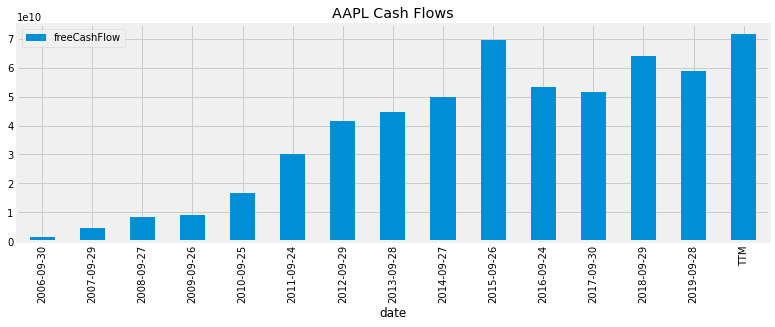

In [6]:
final_cash_flow_statement[['freeCashFlow']].iloc[::-1].iloc[-15:].plot(kind='bar', title=ticker + ' Cash Flows')
plt.show()

#### Now, we shall obtain the balance sheet of Apple.

The balance sheet shows a snapshot of the company’s financial health (all the assets and liabilities that it has) at a moment in time (not summed up over a period of time as with cash flow statement). To get the relevant data of a company to calculate the intrinsic value, we simply need the balance sheet statement for the most recent quarter.

In [7]:
q_balance_statement = pd.DataFrame(get_jsonparsed_data(base_url+'balance-sheet-statement/' + ticker + '?period=quarter' + '&apikey=' + apiKey))
q_balance_statement = q_balance_statement.set_index('date')
q_balance_statement = q_balance_statement.apply(pd.to_numeric, errors='coerce')
q_balance_statement.iloc[:,4:].head()

,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,inventory,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,intangibleAssets,...,retainedEarnings,accumulatedOtherComprehensiveIncomeLoss,othertotalStockholdersEquity,totalStockholdersEquity,totalLiabilitiesAndStockholdersEquity,totalInvestments,totalDebt,netDebt,link,finalLink
date,,,,,,,,,,,,,,,,,,,,,
2020-06-27,33383000000,5.964200e+10,93025000000,32075000000,3.978000e+09,10987000000,140065000000,43851000000,0.0,0.0,...,24136000000,-5.500000e+08,-2.163000e+09,72282000000,317344000000,1.602340e+11,1.133730e+11,7.999000e+10,NaN,NaN
2020-03-28,40174000000,5.387700e+10,94051000000,30677000000,3.334000e+09,15691000000,143753000000,43986000000,0.0,0.0,...,33182000000,-2.789000e+09,-1.315000e+09,78425000000,320400000000,1.526700e+11,1.101550e+11,6.998100e+10,NaN,NaN
2019-12-28,39771000000,6.739100e+10,107162000000,39946000000,4.097000e+09,12026000000,163231000000,44293000000,0.0,0.0,...,43977000000,-4.180000e+08,-1.240000e+09,89531000000,340618000000,1.672900e+11,1.089330e+11,6.916200e+10,NaN,NaN
2019-09-28,48844000000,5.171300e+10,100557000000,45804000000,4.106000e+09,12352000000,162819000000,37378000000,0.0,0.0,...,45898000000,-5.840000e+08,-1.291000e+09,90488000000,338516000000,1.570540e+11,1.080470e+11,5.920300e+10,NaN,NaN
2019-06-29,50530000000,4.408400e+10,94614000000,26474000000,3.355000e+09,10530000000,134973000000,37636000000,0.0,0.0,...,53724000000,-6.390000e+08,-9.670000e+08,96456000000,322239000000,1.600800e+11,1.084180e+11,5.788800e+10,NaN,NaN


In [8]:
cash_flow = final_cash_flow_statement.iloc[0]['freeCashFlow']
total_debt = q_balance_statement.iloc[0]['totalDebt'] 
cash_and_ST_investments = q_balance_statement.iloc[0]['cashAndShortTermInvestments']

print("Free Cash Flow: ", cash_flow)
print("Total Debt: ", total_debt)
print("Cash and ST Investments: ", cash_and_ST_investments)

Free Cash Flow:  71706000000.0
Total Debt:  113373000000.0
Cash and ST Investments:  93025000000.0


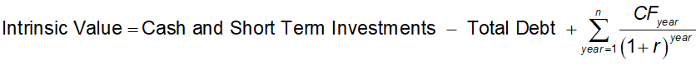

Now let us look at this image above. We have Total Debt as well as Cash and ST investments already.
>What else do we need?

In order to obtain the growth rate of the company, we will be using <a href="https://finviz.com/" ><b>Finviz</b></a>.

We will use the <b>'EPS Next 5Y'</b> to estimate the growth rate of the company for the next 5 years.

After that, we will be more conservative, and halve the growth rate of the company for the next 5 years.

Seeing that the largest holdings of the S&P 500 tend to change around in 5-10 years time (look at General Electric and Exxon Mobile), we will let the growth rate of Apple to be growing along with the inflation rate at 3%, which is what Jerome Powell (Chairman of Federal Reserve) expects for the near future.

From Finviz, we would like to extract the Price, EPS next 5Y, Beta (How closely correlated the stock is to the market) and the number of Shares Outstanding.

In [9]:
# List of data we want to extract from Finviz Table
metric = ['Price', 'EPS next 5Y', 'Beta', 'Shs Outstand']

def fundamental_metric(soup, metric):
    # the table which stores the data in Finviz has html table attribute class of 'snapshot-td2'
    return soup.find(text = metric).find_next(class_='snapshot-td2').text
   
def get_finviz_data(ticker):
    try:
        url = ("http://finviz.com/quote.ashx?t=" + ticker.lower())
        soup = bs(requests.get(url,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) Gecko/20100101 Firefox/20.0'}).content)
        dict_finviz = {}        
        for m in metric:   
            dict_finviz[m] = fundamental_metric(soup,m)
        for key, value in dict_finviz.items():
            # replace percentages
            if (value[-1]=='%'):
                dict_finviz[key] = value[:-1]
                dict_finviz[key] = float(dict_finviz[key])
            # billion
            if (value[-1]=='B'):
                dict_finviz[key] = value[:-1]
                dict_finviz[key] = float(dict_finviz[key])*1000000000  
            # million
            if (value[-1]=='M'):
                dict_finviz[key] = value[:-1]
                dict_finviz[key] = float(dict_finviz[key])*1000000
            try:
                dict_finviz[key] = float(dict_finviz[key])
            except:
                pass 
    except Exception as e:
        print (e)
        print ('Not successful parsing ' + ticker + ' data.')        
    return dict_finviz

finviz_data = get_finviz_data(ticker)

finviz_data

{'Price': 116.97,
 'EPS next 5Y': 12.46,
 'Beta': 1.33,
 'Shs Outstand': 17250000000.0}

Next, from the Beta, we will need to calculate the discount factor so that we can plug it into our formula.

Instead of using the risk-free rate, which is usually taken to be the 10-year yield of US Treasury Bonds, we will base it off Beta.

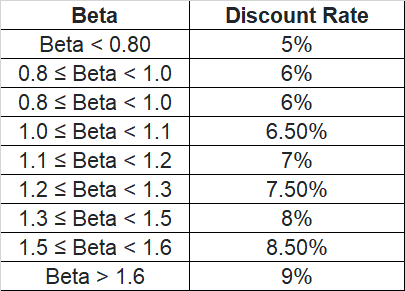

This is the rough guide we will be using.

In [10]:
Beta = finviz_data['Beta']

discount_rate = 7
if(Beta<0.80):
    discount_rate = 5
elif(Beta>=0.80 and Beta<1):
    discount_rate = 6
elif(Beta>=1 and Beta<1.1):
    discount_rate = 6.5
elif(Beta>=1.1 and Beta<1.2):
    discount_rate = 7
elif(Beta>=1.2 and Beta<1.3):
    discount_rate =7.5
elif(Beta>=1.3 and Beta<1.4):
    discount_rate = 8
elif(Beta>=1.4 and Beta<1.6):
    discount_rate = 8.5
elif(Beta>=1.61):
    discount_rate = 9   

print("Discount Rate: ", discount_rate)

Discount Rate:  8


In [11]:
EPS_growth_5Y = finviz_data['EPS next 5Y']
EPS_growth_6Y_to_10Y = EPS_growth_5Y/2  # Half the previous growth rate, conservative estimate
EPS_growth_11Y_to_20Y  = np.minimum(EPS_growth_6Y_to_10Y, 3)

shares_outstanding = finviz_data['Shs Outstand']

print("Free Cash Flow: ", cash_flow)
print("Total Debt: ", total_debt)
print("Cash and ST Investments: ", cash_and_ST_investments)

print("EPS Growth 5Y: ", EPS_growth_5Y)
print("EPS Growth 6Y to 10Y: ", EPS_growth_6Y_to_10Y)
print("EPS Growth 11Y to 20Y: ", EPS_growth_11Y_to_20Y)

print("Discount Rate: ", discount_rate)

print("Shares Outstanding: ", shares_outstanding)

Free Cash Flow:  71706000000.0
Total Debt:  113373000000.0
Cash and ST Investments:  93025000000.0
EPS Growth 5Y:  12.46
EPS Growth 6Y to 10Y:  6.23
EPS Growth 11Y to 20Y:  3.0
Discount Rate:  8
Shares Outstanding:  17250000000.0


Discounted Cash Flows

Year 1: $74667192222.22221
Year 2: $77750670715.84361
Year 3: $80961485450.96088
Year 4: $84304894942.73203
Year 5: $87786374863.51521
Year 6: $86347653719.91872
Year 7: $84932511617.28668
Year 8: $83540562121.33672
Year 9: $82171425131.0148
Year 10: $80824726774.70094
Year 11: $77082841275.87221
Year 12: $73514191216.80403
Year 13: $70110756438.24829
Year 14: $66864888084.62568
Year 15: $63769291414.04116
Year 16: $60817009404.13184
Year 17: $58001407116.90351
Year 18: $55316156787.41724
Year 19: $52755223602.81458
Year 20: $50312852139.721306


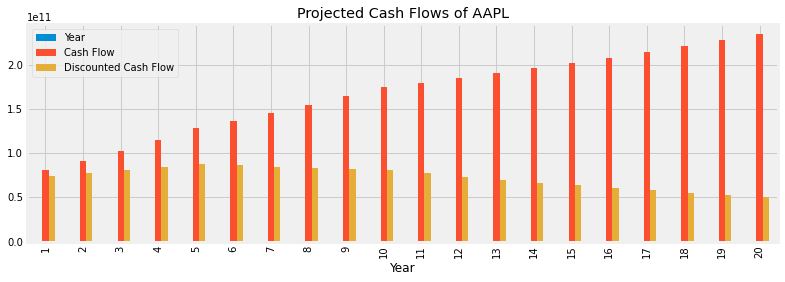

In [12]:
def calculate_intrinsic_value(cash_flow, total_debt, cash_and_ST_investments, 
                                  EPS_growth_5Y, EPS_growth_6Y_to_10Y, EPS_growth_11Y_to_20Y,
                                  shares_outstanding, discount_rate):   
    
    # Convert all percentages to decmials
    EPS_growth_5Y_d = EPS_growth_5Y/100
    EPS_growth_6Y_to_10Y_d = EPS_growth_6Y_to_10Y/100
    EPS_growth_11Y_to_20Y_d = EPS_growth_11Y_to_20Y/100
    discount_rate_d = discount_rate/100
    print("Discounted Cash Flows\n")
    
    # Lists of projected cash flows from year 1 to year 20
    cash_flow_list = []
    cash_flow_discounted_list = []
    year_list = []
    
    
    # Years 1 to 5
    for year in range(1, 6):
        year_list.append(year)
        cash_flow*=(1 + EPS_growth_5Y_d)        
        cash_flow_list.append(cash_flow)
        cash_flow_discounted = cash_flow/((1 + discount_rate_d)**year)
        cash_flow_discounted_list.append(cash_flow_discounted)
        print("Year " + str(year) + ": $" + str(cash_flow_discounted)) ## Print out the projected discounted cash flows
    
    # Years 6 to 10
    for year in range(6, 11):
        year_list.append(year)
        cash_flow*=(1 + EPS_growth_6Y_to_10Y_d)
        cash_flow_list.append(cash_flow)
        cash_flow_discounted = cash_flow/((1 + discount_rate_d)**year)
        cash_flow_discounted_list.append(cash_flow_discounted)
        print("Year " + str(year) + ": $" + str(cash_flow_discounted)) ## Print out the projected discounted cash flows
    
    # Years 11 to 20
    for year in range(11, 21):
        year_list.append(year)
        cash_flow*=(1 + EPS_growth_11Y_to_20Y_d)
        cash_flow_list.append(cash_flow)
        cash_flow_discounted = cash_flow/((1 + discount_rate_d)**year)
        cash_flow_discounted_list.append(cash_flow_discounted)
        print("Year " + str(year) + ": $" + str(cash_flow_discounted)) ## Print out the projected discounted cash flows
    
    intrinsic_value = (sum(cash_flow_discounted_list) - total_debt + cash_and_ST_investments)/shares_outstanding
    df = pd.DataFrame.from_dict({'Year': year_list, 'Cash Flow': cash_flow_list, 'Discounted Cash Flow': cash_flow_discounted_list})
    df.index = df.Year
    df.plot(kind='bar', title = 'Projected Cash Flows of ' + ticker)
    plt.show()

    return intrinsic_value


intrinsic_value = calculate_intrinsic_value(cash_flow, total_debt, cash_and_ST_investments, 
                                  EPS_growth_5Y, EPS_growth_6Y_to_10Y, EPS_growth_11Y_to_20Y,
                                  shares_outstanding, discount_rate)   

In [13]:
print("Intrinsic Value: ", intrinsic_value)
current_price = finviz_data['Price']
print("Current Price: ", current_price)
print("Margin of Safety: ", (1-current_price/intrinsic_value)*100)    

Intrinsic Value:  82.9845863791369
Current Price:  116.97
Margin of Safety:  -40.95388686471462


In [14]:
# Pseudo-code thought process
# 1. Obtain quarterly cash flow statements
# 2. Obtain annual cash flow statements
# 3. Combine the 2 dataframes and form TTM row
# 4. Obtain Free Cash Flows for past 15 years to plot graph and check stability of cash flows
# 5. Get balance sheet
# 6. From balance sheet, obtain total debt as well as cash and short-term investments
# 7. Go to finviz to scrape 'Price', 'EPS next 5Y', 'Beta', 'Shs Outstand'
# 8. From Beta obtained, calculate Discount Factor
# 9. Assign the relevant values to variables
# 10. Calculate future cash flows
# 11. Plot cash flows on grow
# 12. Obtain intrinsic value and calculate margin of safety

AAPL Summary
----------------------------------------------------------------------------------------------------


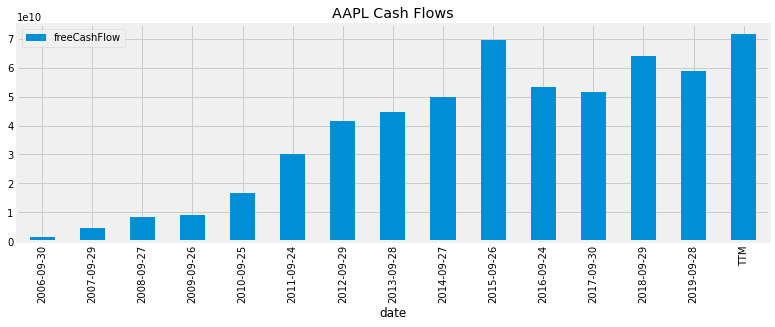

Free Cash Flow:  71706000000.0
Total Debt:  113373000000.0
Cash and ST Investments:  93025000000.0
Discount Rate:  8
Free Cash Flow:  71706000000.0
Total Debt:  113373000000.0
Cash and ST Investments:  93025000000.0
EPS Growth 5Y:  12.46
EPS Growth 6Y to 10Y:  6.23
EPS Growth 11Y to 20Y:  3.0
Discount Rate:  8
Shares Outstanding:  17250000000.0
Discounted Cash Flows

Year 1: $74667192222.22221
Year 2: $77750670715.84361
Year 3: $80961485450.96088
Year 4: $84304894942.73203
Year 5: $87786374863.51521
Year 6: $86347653719.91872
Year 7: $84932511617.28668
Year 8: $83540562121.33672
Year 9: $82171425131.0148
Year 10: $80824726774.70094
Year 11: $77082841275.87221
Year 12: $73514191216.80403
Year 13: $70110756438.24829
Year 14: $66864888084.62568
Year 15: $63769291414.04116
Year 16: $60817009404.13184
Year 17: $58001407116.90351
Year 18: $55316156787.41724
Year 19: $52755223602.81458
Year 20: $50312852139.721306


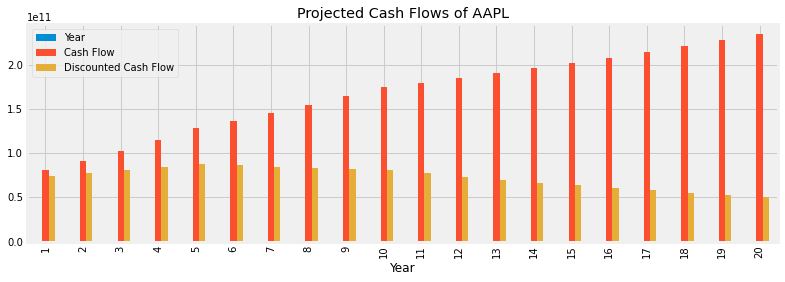

Intrinsic Value:  82.9845863791369
Current Price:  116.97
Margin of Safety:  -40.95388686471462
END OF AAPL
----------------------------------------------------------------------------------------------------
AMZN Summary
----------------------------------------------------------------------------------------------------


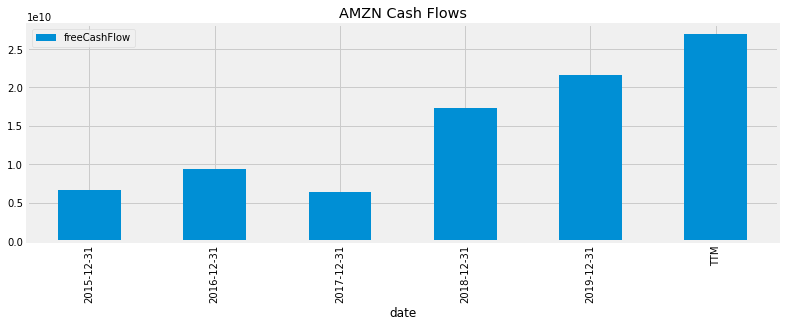

Free Cash Flow:  26957000000.0
Total Debt:  51011000000.0
Cash and ST Investments:  71391000000.0
Discount Rate:  7.5
Free Cash Flow:  26957000000.0
Total Debt:  51011000000.0
Cash and ST Investments:  71391000000.0
EPS Growth 5Y:  36.03
EPS Growth 6Y to 10Y:  18.015
EPS Growth 11Y to 20Y:  3.0
Discount Rate:  7.5
Shares Outstanding:  500000000.0
Discounted Cash Flows

Year 1: $34111262418.604652
Year 2: $43164232807.46783
Year 3: $54619819430.69627
Year 4: $69115665461.9313
Year 5: $87458641607.31644
Year 6: $96013317109.6507
Year 7: $105404759243.6784
Year 8: $115714815461.79262
Year 9: $127033339039.28798
Year 10: $139458972155.5495
Year 11: $133621154716.48003
Year 12: $128027711030.67389
Year 13: $122668411499.15733
Year 14: $117533454738.72751
Year 15: $112613449656.64124
Year 16: $107899398275.66556
Year 17: $103382679278.07956
Year 18: $99055032238.53206
Year 19: $94908542516.9191
Year 20: $90935626783.65271


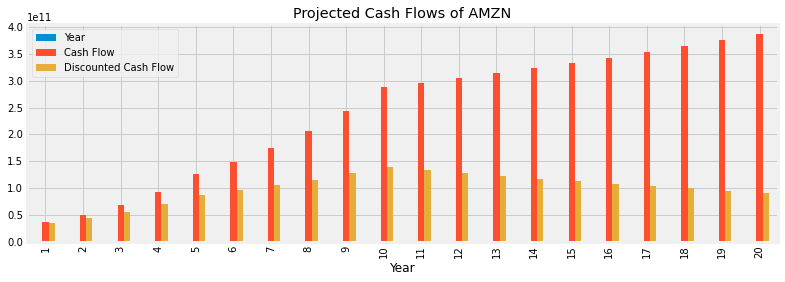

Intrinsic Value:  4006.2405709410086
Current Price:  3286.65
Margin of Safety:  17.961741393178166
END OF AMZN
----------------------------------------------------------------------------------------------------
MSFT Summary
----------------------------------------------------------------------------------------------------


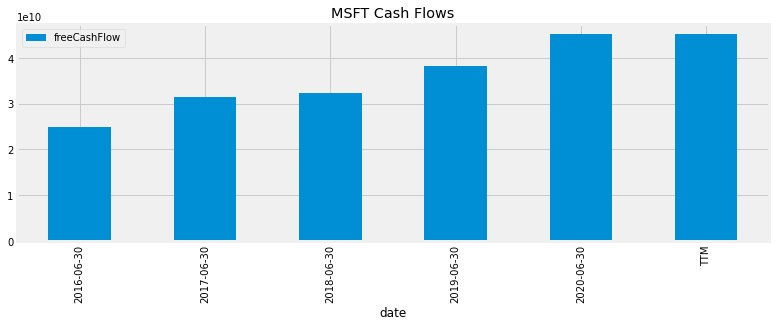

Free Cash Flow:  45234000000.0
Total Debt:  72823000000.0
Cash and ST Investments:  136527000000.0
Discount Rate:  6
Free Cash Flow:  45234000000.0
Total Debt:  72823000000.0
Cash and ST Investments:  136527000000.0
EPS Growth 5Y:  14.97
EPS Growth 6Y to 10Y:  7.485
EPS Growth 11Y to 20Y:  3.0
Discount Rate:  6
Shares Outstanding:  7580000000.0
Discounted Cash Flows

Year 1: $49061820566.037735
Year 2: $53213561419.59771
Year 3: $57716633551.04857
Year 4: $62600767541.1703
Year 5: $67898209851.02216
Year 6: $68849425338.08601
Year 7: $69813966815.69977
Year 8: $70792020973.44803
Year 9: $71783777116.33076
Year 10: $72789427201.4039
Year 11: $70729349073.06227
Year 12: $68727575042.6926
Year 13: $66782454994.31451
Year 14: $64892385513.34334
Year 15: $63055808564.8525
Year 16: $61271210209.24346
Year 17: $59537119354.26488
Year 18: $57852106542.351715
Year 19: $56214782772.285164
Year 20: $54623798354.20162


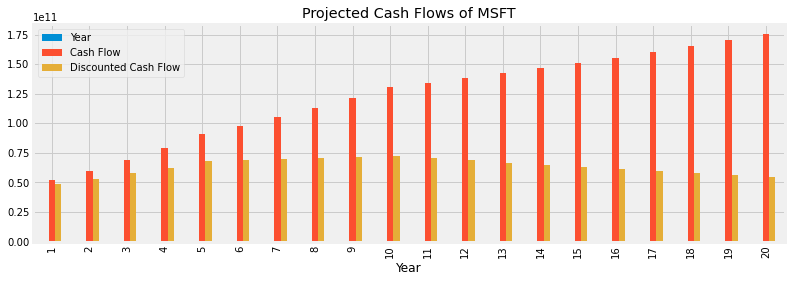

Intrinsic Value:  175.7137468066566
Current Price:  215.81
Margin of Safety:  -22.81907586744627
END OF MSFT
----------------------------------------------------------------------------------------------------
GOOGL Summary
----------------------------------------------------------------------------------------------------


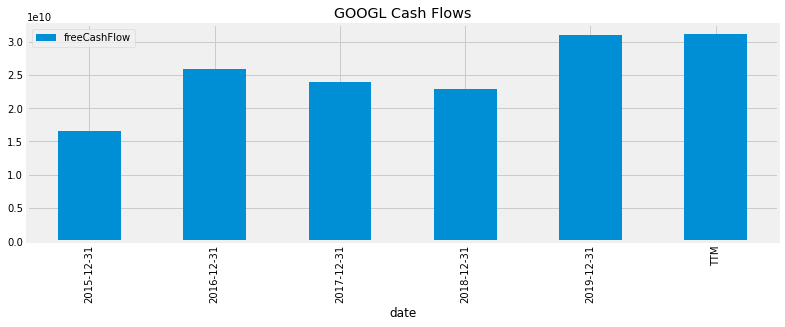

Free Cash Flow:  31157000000.0
Total Debt:  5154000000.0
Cash and ST Investments:  121080000000.0
Discount Rate:  6.5
Free Cash Flow:  31157000000.0
Total Debt:  5154000000.0
Cash and ST Investments:  121080000000.0
EPS Growth 5Y:  4.81
EPS Growth 6Y to 10Y:  2.405
EPS Growth 11Y to 20Y:  2.405
Discount Rate:  6.5
Shares Outstanding:  681770000.0
Discounted Cash Flows

Year 1: $30662583755.868546
Year 2: $30176013177.958523
Year 3: $29697163766.965565
Year 4: $29225912999.20808
Year 5: $28762140295.27699
Year 6: $27656215745.89521
Year 7: $26592814774.257263
Year 8: $25570302318.852726
Year 9: $24587106187.437683
Year 10: $23641714639.66719
Year 11: $22732674062.67717
Year 12: $21858586736.041836
Year 13: $21018108682.670082
Year 14: $20209947602.33643
Year 15: $19432860884.66913
Year 16: $18685653698.5403
Year 17: $17967177154.92037
Year 18: $17276326540.372017
Year 19: $16612039618.467575
Year 20: $15973294996.518044


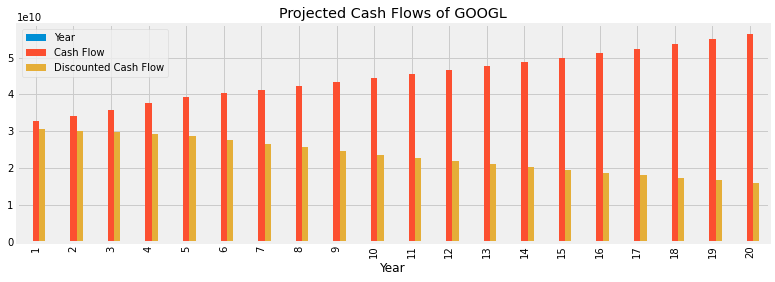

Intrinsic Value:  856.9820285999688
Current Price:  1510.45
Margin of Safety:  -76.25223745561927
END OF GOOGL
----------------------------------------------------------------------------------------------------
FB Summary
----------------------------------------------------------------------------------------------------


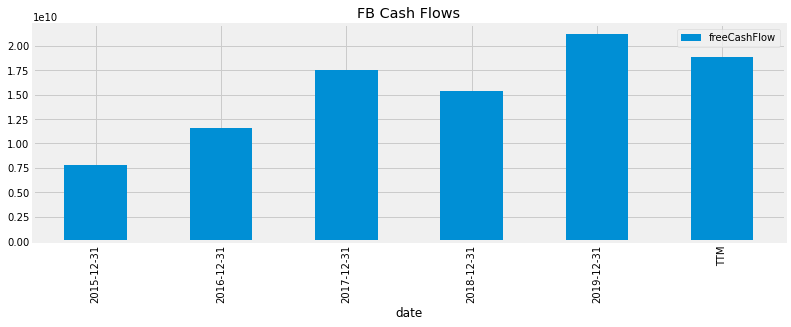

Free Cash Flow:  18823000000.0
Total Debt:  472000000.0
Cash and ST Investments:  58240000000.0
Discount Rate:  7.5
Free Cash Flow:  18823000000.0
Total Debt:  472000000.0
Cash and ST Investments:  58240000000.0
EPS Growth 5Y:  20.27
EPS Growth 6Y to 10Y:  10.135
EPS Growth 11Y to 20Y:  3.0
Discount Rate:  7.5
Shares Outstanding:  2850000000.0
Discounted Cash Flows

Year 1: $21058997302.325584
Year 2: $23560610284.192543
Year 3: $26359391617.486862
Year 4: $29490642138.001347
Year 5: $32993856092.441143
Year 6: $33802589216.195396
Year 7: $34631145705.35516
Year 8: $35480011462.87713
Year 9: $36349684301.99045
Year 10: $37240674238.13692
Year 11: $35681762293.284676
Year 12: $34188107127.51927
Year 13: $32756977061.716145
Year 14: $31385754766.10943
Year 15: $30071932473.574615
Year 16: $28813107393.285442
Year 17: $27606977316.357216
Year 18: $26451336405.43994
Year 19: $25344071160.561058
Year 20: $24283156553.8399


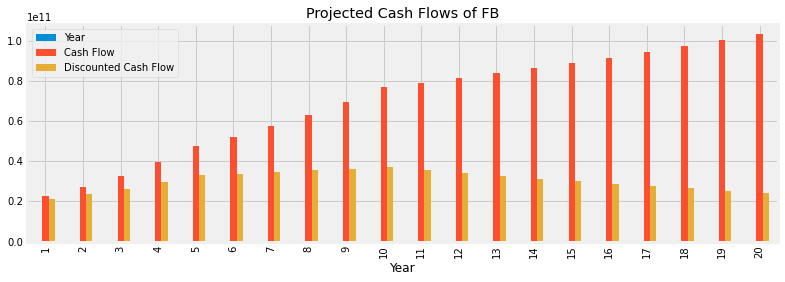

Intrinsic Value:  233.44518768796146
Current Price:  264.45
Margin of Safety:  -13.281409918580822
END OF FB
----------------------------------------------------------------------------------------------------


In [15]:
tickers = ['AAPL', 'AMZN', 'MSFT', 'GOOGL', 'FB']

for ticker in tickers:
    print(ticker + " Summary")
    print("-"*100)
    
    q_cash_flow_statement = pd.DataFrame(get_jsonparsed_data(base_url+'cash-flow-statement/' + ticker + 
                                                             '?period=quarter' + '&apikey=' + apiKey))
    q_cash_flow_statement = q_cash_flow_statement.set_index('date').iloc[:4] # extract for last 4 quarters
    q_cash_flow_statement = q_cash_flow_statement.apply(pd.to_numeric, errors='coerce')

    cash_flow_statement = pd.DataFrame(get_jsonparsed_data(base_url+'cash-flow-statement/' + ticker + '?apikey=' + apiKey))
    cash_flow_statement = cash_flow_statement.set_index('date')
    cash_flow_statement = cash_flow_statement.apply(pd.to_numeric, errors='coerce')
    
    ttm_cash_flow_statement = q_cash_flow_statement.sum() # sum up last 4 quarters to get TTM cash flow
    cash_flow_statement = cash_flow_statement[::-1].append(ttm_cash_flow_statement.rename('TTM')).drop(['netIncome'], axis=1)
    final_cash_flow_statement = cash_flow_statement[::-1] # reverse list to show most recent ones first
    
    final_cash_flow_statement[['freeCashFlow']].iloc[::-1].iloc[-15:].plot(kind='bar', title=ticker + ' Cash Flows')
    plt.show()
    
    q_balance_statement = pd.DataFrame(get_jsonparsed_data(base_url+'balance-sheet-statement/' + ticker + '?period=quarter' + 
                                                           '&apikey=' + apiKey))
    q_balance_statement = q_balance_statement.set_index('date')
    q_balance_statement = q_balance_statement.apply(pd.to_numeric, errors='coerce')
    
    cash_flow = final_cash_flow_statement.iloc[0]['freeCashFlow']
    total_debt = q_balance_statement.iloc[0]['totalDebt'] 
    cash_and_ST_investments = q_balance_statement.iloc[0]['cashAndShortTermInvestments']

    print("Free Cash Flow: ", cash_flow)
    print("Total Debt: ", total_debt)
    print("Cash and ST Investments: ", cash_and_ST_investments)
    
    # List of data we want to extract from Finviz Table
    metric = ['Price', 'EPS next 5Y', 'Beta', 'Shs Outstand']

    def fundamental_metric(soup, metric):
        # the table which stores the data in Finviz has html table attribute class of 'snapshot-td2'
        return soup.find(text = metric).find_next(class_='snapshot-td2').text

    def get_finviz_data(ticker):
        try:
            url = ("http://finviz.com/quote.ashx?t=" + ticker.lower())
            soup = bs(requests.get(url,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) Gecko/20100101 Firefox/20.0'}).content)
            dict_finviz = {}        
            for m in metric:   
                dict_finviz[m] = fundamental_metric(soup,m)
            for key, value in dict_finviz.items():
                # replace percentages
                if (value[-1]=='%'):
                    dict_finviz[key] = value[:-1]
                    dict_finviz[key] = float(dict_finviz[key])
                # billion
                if (value[-1]=='B'):
                    dict_finviz[key] = value[:-1]
                    dict_finviz[key] = float(dict_finviz[key])*1000000000  
                # million
                if (value[-1]=='M'):
                    dict_finviz[key] = value[:-1]
                    dict_finviz[key] = float(dict_finviz[key])*1000000
                try:
                    dict_finviz[key] = float(dict_finviz[key])
                except:
                    pass 
        except Exception as e:
            print (e)
            print ('Not successful parsing ' + ticker + ' data.')        
        return dict_finviz

    finviz_data = get_finviz_data(ticker)

    finviz_data
    
    Beta = finviz_data['Beta']

    discount_rate = 7
    if(Beta<0.80):
        discount_rate = 5
    elif(Beta>=0.80 and Beta<1):
        discount_rate = 6
    elif(Beta>=1 and Beta<1.1):
        discount_rate = 6.5
    elif(Beta>=1.1 and Beta<1.2):
        discount_rate = 7
    elif(Beta>=1.2 and Beta<1.3):
        discount_rate =7.5
    elif(Beta>=1.3 and Beta<1.4):
        discount_rate = 8
    elif(Beta>=1.4 and Beta<1.6):
        discount_rate = 8.5
    elif(Beta>=1.61):
        discount_rate = 9   

    print("Discount Rate: ", discount_rate)
    
    EPS_growth_5Y = finviz_data['EPS next 5Y']
    EPS_growth_6Y_to_10Y = EPS_growth_5Y/2  # Half the previous growth rate, conservative estimate
    EPS_growth_11Y_to_20Y  = np.minimum(EPS_growth_6Y_to_10Y, 3)

    shares_outstanding = finviz_data['Shs Outstand']

    print("Free Cash Flow: ", cash_flow)
    print("Total Debt: ", total_debt)
    print("Cash and ST Investments: ", cash_and_ST_investments)

    print("EPS Growth 5Y: ", EPS_growth_5Y)
    print("EPS Growth 6Y to 10Y: ", EPS_growth_6Y_to_10Y)
    print("EPS Growth 11Y to 20Y: ", EPS_growth_11Y_to_20Y)

    print("Discount Rate: ", discount_rate)

    print("Shares Outstanding: ", shares_outstanding)
    
    def calculate_intrinsic_value(cash_flow, total_debt, cash_and_ST_investments, 
                                  EPS_growth_5Y, EPS_growth_6Y_to_10Y, EPS_growth_11Y_to_20Y,
                                  shares_outstanding, discount_rate):   
    
        # Convert all percentages to decmials
        EPS_growth_5Y_d = EPS_growth_5Y/100
        EPS_growth_6Y_to_10Y_d = EPS_growth_6Y_to_10Y/100
        EPS_growth_11Y_to_20Y_d = EPS_growth_11Y_to_20Y/100
        discount_rate_d = discount_rate/100
        print("Discounted Cash Flows\n")

        # Lists of projected cash flows from year 1 to year 20
        cash_flow_list = []
        cash_flow_discounted_list = []
        year_list = []


        # Years 1 to 5
        for year in range(1, 6):
            year_list.append(year)
            cash_flow*=(1 + EPS_growth_5Y_d)        
            cash_flow_list.append(cash_flow)
            cash_flow_discounted = cash_flow/((1 + discount_rate_d)**year)
            cash_flow_discounted_list.append(cash_flow_discounted)
            print("Year " + str(year) + ": $" + str(cash_flow_discounted)) ## Print out the projected discounted cash flows

        # Years 6 to 10
        for year in range(6, 11):
            year_list.append(year)
            cash_flow*=(1 + EPS_growth_6Y_to_10Y_d)
            cash_flow_list.append(cash_flow)
            cash_flow_discounted = cash_flow/((1 + discount_rate_d)**year)
            cash_flow_discounted_list.append(cash_flow_discounted)
            print("Year " + str(year) + ": $" + str(cash_flow_discounted)) ## Print out the projected discounted cash flows

        # Years 11 to 20
        for year in range(11, 21):
            year_list.append(year)
            cash_flow*=(1 + EPS_growth_11Y_to_20Y_d)
            cash_flow_list.append(cash_flow)
            cash_flow_discounted = cash_flow/((1 + discount_rate_d)**year)
            cash_flow_discounted_list.append(cash_flow_discounted)
            print("Year " + str(year) + ": $" + str(cash_flow_discounted)) ## Print out the projected discounted cash flows

        intrinsic_value = (sum(cash_flow_discounted_list) - total_debt + cash_and_ST_investments)/shares_outstanding
        df = pd.DataFrame.from_dict({'Year': year_list, 'Cash Flow': cash_flow_list, 'Discounted Cash Flow': 
                                     cash_flow_discounted_list})
        df.index = df.Year
        df.plot(kind='bar', title = 'Projected Cash Flows of ' + ticker)
        plt.show()

        return intrinsic_value


    intrinsic_value = calculate_intrinsic_value(cash_flow, total_debt, cash_and_ST_investments, 
                                      EPS_growth_5Y, EPS_growth_6Y_to_10Y, EPS_growth_11Y_to_20Y,
                                      shares_outstanding, discount_rate)   
    print("Intrinsic Value: ", intrinsic_value)
    current_price = finviz_data['Price']
    print("Current Price: ", current_price)
    print("Margin of Safety: ", (1-current_price/intrinsic_value)*100)
    
    print("END OF " + ticker)
    print("-"*100)
